# SNEAKER SITE WEB SCRAPE

The purpose of this program is aimed to conduct analytics of across various sneaker oriented websites

## Phase1: Environment Setup

Import the necessary modules

In [84]:
import requests
import time as t
import pandas as pd
import datetime
import pprint
from datetime import date 
from bs4 import BeautifulSoup

import glob
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as po
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# external python files
import plot_functions as pf
import text_functions as tf
# from collections import Counter
# from string import punctuation

In [85]:
program_start = t.time()

Create a class in order to develop website objects

In [86]:
# 1.1 Class Declaration ------------------------------------------------------#
class sneaker_site:
    '''
    DESCRIPTION: Purpose of this class is to store website data located from various
        sneaker websites and retrieve pertinent key words from each object's scrape.
        The data scraped is then transformed into a tibble, which is then exported as 
        it's on individual CSV, later utilized for follow-on analytics
    '''
    
    # initialize the class
    def __init__ (self, name, url): # provide the name of the website and the url
        '''
        DESCRIPTION: initialize class with default class arguments
        '''
        self.website_name = name # set the name
        self.url = url # save the url
        self.site_text = '' # value to save the site text for each object
        self.converted_site_text = '' # converting the extracted value to lower case, via the 'text_functions' file
        self.lines = ''
        
        # create a dataframe to store extracted values for each object
        self.site_df = pd.DataFrame(columns = ['website','dtg', 'date','year', 'month', 'day', 'shoe_company', 'brand', 'count'])
        self.site_df['website'] = self.website_name # assign the website name to the entire class dataframe
        
        # creating Beautiful Soup variables to store individual values
        self.soup = '' # variable to store the complete values 
        self.hyperlink_list = '' # variable to store the hyperlinks tags
        self.paragraph_list = '' # variable to store paragraph value tags
        self.bold_list = '' # variable to store bold value tags
        
        # create the site variables to aggregate total counts for each object
        self.nike_site_count = 0
        self.adidas_site_count = 0
        self.reebok_site_count = 0
        self.new_balance_site_count = 0
        self.puma_site_count = 0
        self.vans_site_count = 0

        # default Nike list with different Nike shoe companies
        self.nike_master = ['nike', 'jordan', 'converse'] 
        # ['Nike', 'Air', 'Max', 'Jordan', 'Zoom', 'React', 'Shox', 'ACG', 'Max Plus', 'Joyride', 'Tinker', 'Force', 'Westbrook', 'Kyrie','Lebron', 'Durant', 'SB', 'Air Max 90', 'Air Max 97', 'Air Max 1', 'Kyrie', 'Air Max 270', 'Travis Scott' ]

        # default Adidas list with different Adidas shoe companies
        self.adidas_master = ['adidas', 'reebok', 'adidas', 'kanye', 'yeezy']
        # ['Adidas', 'ADIDAS', 'adidas', 'Yeezy', 'Kanye', 'Ultraboost', 'EQT', 'NMD', 'Ultra Boost', 'FYW', 'Harden']
        
        # default New Balance list 
        self.new_balance_master = ['NB', 'new balance']
        # ['New Balance', 'NB', 'Balance', '997', '801']
        
        # default Puma LIst
        self.puma_master = ['Puma', 'puma']
        #['Puma', 'Cell Venom', 'Thunder Spectre', 'Clyde Court']

        # default Vans list
        self.vans_master = ['Vans','vans']
        
        # concatenante the individual sneaker lists into one master list
        self.sneaker_list = self.nike_master + self.adidas_master + self.new_balance_master + self.puma_master + self.vans_master
        self.length = len(self.sneaker_list)         
        print("{} website object created".format(self.website_name))
    
    # class function to calculate the counts of each sneaker value in the master 'sneaker_list' data structure
    def site_calculate(self):
        '''
        DESCRIPTION: extract each website's raw data and append in the object's dataframe
        '''
        
        # to calculate the time needed to process the function from start to finish
        start_time = t.time() 
        print("\nRetrieving {} text and data ...".format(self.website_name))
        
        # establish connection to the website
        r = requests.get(self.url)
        self.soup = BeautifulSoup(r.content, "html.parser")
        
        # find and categorize all hyperlink (a), paragraph (p), and bold (b) html tags
        print("\nConsolidating all hyperlinks and paragraphs for", self.website_name)        
        self.hyperlink_list = self.soup.findAll('a')
        self.paragraph_list = self.soup.findAll('p')
        self.bold_list = self.soup.findAll('b')
        
        # convert individual Soup categories to text
        self.site_text = self.soup.get_text()
        self.converted_site_text = tf.normalize_string(self.site_text)
        print("\nConverting ", self.website_name, " to text file ... ")
        
        self.lines = [self.site_text.lower() for line in self.site_text]
        print("\nCalculating individual counts: " )
        
        index_num = 0

        # utilize the for loop to iterate over each object and count the .... 
        # ... amount of times a value is depicted in each extraction
        for brand in self.sneaker_list:
            
            # allocate object variables as values for the class dataframe
            website = self.website_name
            name = brand + ': '
            count = self.converted_site_text.count(brand) # count text items
            today = date.today()
            dtg = datetime.datetime.now()
            year = dtg.year
            month = dtg.month
            day_num = dtg.day

            shoe_company = ''
            
            # if count > 0 , aggregate the count based on shoe company name
            if count > 0:
                if brand in self.nike_master:
                    self.nike_site_count += count
                    shoe_company = 'Nike'
                elif brand in self.adidas_master:
                    self.adidas_site_count += count
                    shoe_company = 'Adidas'
                elif brand in self.new_balance_master:
                    self.new_balance_site_count += count
                    shoe_company = 'New Balance'
                elif brand in self.puma_master:
                    self.puma_site_count += count
                    shoe_company = 'Puma'
                elif brand in self.vans_master:
                    self.vans_site_count += count
                    shoe_company = 'Vans'
                else: 
                    0
            else: 
                if brand in self.nike_master:
                    shoe_company = 'Nike'
                elif brand in self.adidas_master:
                    shoe_company = 'Adidas'
                elif brand in self.new_balance_master:
                    shoe_company = 'New Balance'
                elif brand in self.puma_master:
                    shoe_company = 'Puma'
                elif brand in self.vans_master:
                    shoe_company = 'Vans'
                else: 
                    0      
                    
            # append each new row to the class dataframe
            self.site_df.loc[index_num] = [website, dtg, today, year, month, day_num, shoe_company, brand, count]        
            print(name, count)
            index_num += 1
        
        elapsed_time = t.time() - start_time 
        print("\n{} data ingest completed, total elapsed time: {} seconds\n".format(self.website_name, round(elapsed_time,2)))
        
    def display_info(self):
        '''
        DESCRIPTION: display object information
        '''
        print("\nCalculating total counts by shoe company...")
        print("Total Nike mentions: ", self.nike_site_count)
        print("Total Adidas mentions: ", self.adidas_site_count)
        print("Total New Balance mentions: ", self.new_balance_site_count)
        print("Total Puma mentions: ", self.puma_site_count)      
        print("Total Vans mentions: ", self.vans_site_count)      
        # print(self.site_df)      
        
    def return_df(self):
        '''
        DESCRIPTION: return class dataframe 
        '''
        return self.site_df

    def display_soup(self):
        '''
        DESCRIPTION: display hyperlinks for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.soup)
    
    def display_links(self):
        '''
        DESCRIPTION: display hyperlinks for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.hyperlink_list)
    
    def display_paragraphs(self):
        '''
        DESCRIPTION: display paragraphs for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.paragraph_list)
        
    def display_bold(self):
        '''
        DESCRIPTION: display bold tags for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.bold_list)  

In [ ]:
def cusum(df, time_col, val_col, running_avg_count, confidence_interval):
    '''
    Purpose: A timeseries function aimed to conduct a change point detection analysis of timeseries data
    '''
    
    mod_df = df[[time_col, val_col]]
    mod_df['cusum'] = mod_df[val_col].cusum()
    return mod_df

## Phase 2: Data ETL

### Sneakernews.com Scrape

In [87]:
## 2.1: SNEAKERNEWS.com ingest and analysis -----------------------------------#

start_time = t.time() # calculate elapsed time

sneaker_news = sneaker_site('sneakernews.com', 'https://sneakernews.com/')
sneaker_news.site_calculate()
sneaker_news.display_info()

elapsed_time = round(t.time() - start_time, 2)
print(" Total elapsed time in seconds: ", elapsed_time)

sneakernews.com website object created

Retrieving sneakernews.com text and data ...

Consolidating all hyperlinks and paragraphs for sneakernews.com

Converting  sneakernews.com  to text file ... 

Calculating individual counts: 
nike:  9
jordan:  22
converse:  2
adidas:  7
reebok:  3
adidas:  7
kanye:  0
yeezy:  6
NB:  0
new balance:  4
Puma:  0
puma:  2
Vans:  0
vans:  2

sneakernews.com data ingest completed, total elapsed time: 1.9 seconds


Calculating total counts by shoe company...
Total Nike mentions:  33
Total Adidas mentions:  23
Total New Balance mentions:  4
Total Puma mentions:  2
Total Vans mentions:  2
 Total elapsed time in seconds:  2.15


In [88]:
sneaker_news.display_soup()

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<meta content="#FFFFFF" name="msapplication-TileColor"/>
<meta content="https://sneakernews.com/wp-content/themes/sneakernews/images/favicon-144.png" name="msapplication-TileImage"/>
<meta content="https://sneakernews.com/wp-content/themes/sneakernews/images/browserconfig.xml" name="msapplication-config"/>
<meta content="672125259652768" property="fb:app_id">
<!-- Admin Facebook Profile ID -->
<link href="https://sneakernews.com/wp-content/themes/sneakernews/images/favicon_icon.png" rel="shortcut icon" sizes="32x32" type="image/png"/>
<link href="https://sneakernews.com/wp-content/themes/sneakernews/images/favicon_icon.png" rel="apple-touch-icon" sizes="32x32" type="image/png"/>
<link href="" rel="shortcut icon">
<link href="https://sneakernews.com/wp-content/themes/sneakernews/

In [89]:
sneaker_news.display_links()

[   <a class="skip-link" href="#main-content">Skip to main content</a>,
    <a href="https://sneakernews.com/">
<img alt="default logo image" class="" src="https://sneakernews.com/wp-content/themes/sneakernews/images/site-logo.png"/> </a>,
    <a class="white-logo" href="https://sneakernews.com/">
<img alt="default logo image" class="" src="https://sneakernews.com/wp-content/themes/sneakernews/images/site-logo-white.png"/> </a>,
    <a href="https://sneakernews.com/">
<img alt="default logo image" class="" src="https://sneakernews.com/wp-content/themes/sneakernews/images/sticky-menu-logo.png"/><img alt="default logo image" class="white-logo" src="https://sneakernews.com/wp-content/themes/sneakernews/images/sticky-menu-logo-white.png"/> </a>,
    <a href="https://sneakernews.com/">News</a>,
    <a href="https://sneakernews.com/tag/where-to-buy/">Where To Buy</a>,
    <a href="https://www.youtube.com/user/sneakernews?sub_confirmation=1" rel="noopener noreferrer" target="_blank">Youtube</

In [90]:
sneaker_news.display_paragraphs()

[   <p>
<a href="https://sneakernews.com/2020/03/21/air-jordan-6-dmp-2020-ct4954-007-release-date/">Returning April 11th                            </a>
</p>,
    <p class="copyright">© 2007-2019 Sneaker News Inc<a class="powered-by-wpcom" href="https://wpvip.com/?utm_source=vip_powered_wpcom&amp;utm_medium=web&amp;utm_campaign=VIP%20Footer%20Credit&amp;utm_term=sneakernews.com" rel="generator nofollow"><img alt="Powered by WordPress.com VIP" height="26" src="https://sneakernews.com/wp-content/mu-plugins/vip-helpers/images/vip-powered-dark-small.png" width="187"/></a></p>]


In [91]:
sneaker_news.display_bold()

[]


In [92]:
# retrieve master sneakernews.com dataframe
sneaker_news_df = sneaker_news.return_df()
sneaker_news_df.head(10)

,website,dtg,date,year,month,day,shoe_company,brand,count
0,sneakernews.com,2020-03-31 05:40:00.793378,2020-03-31,2020,3,31,Nike,nike,9
1,sneakernews.com,2020-03-31 05:40:00.801724,2020-03-31,2020,3,31,Nike,jordan,22
2,sneakernews.com,2020-03-31 05:40:00.805389,2020-03-31,2020,3,31,Nike,converse,2
3,sneakernews.com,2020-03-31 05:40:00.808816,2020-03-31,2020,3,31,Adidas,adidas,7
4,sneakernews.com,2020-03-31 05:40:00.812175,2020-03-31,2020,3,31,Adidas,reebok,3
5,sneakernews.com,2020-03-31 05:40:00.815660,2020-03-31,2020,3,31,Adidas,adidas,7
6,sneakernews.com,2020-03-31 05:40:00.819129,2020-03-31,2020,3,31,Adidas,kanye,0
7,sneakernews.com,2020-03-31 05:40:00.822611,2020-03-31,2020,3,31,Adidas,yeezy,6
8,sneakernews.com,2020-03-31 05:40:00.826236,2020-03-31,2020,3,31,New Balance,NB,0
9,sneakernews.com,2020-03-31 05:40:00.829760,2020-03-31,2020,3,31,New Balance,new balance,4


In [93]:
# website plotting
#pf.bar_chart(sneaker_news_df,'shoe_company', 'count', 'Sneakernews.com Count Summary')

sneaker_news_raw = sneaker_news_df[['shoe_company', 'count']]
sneaker_news_sum = sneaker_news_raw.groupby(['shoe_company']).sum().reset_index()

fig = px.bar(sneaker_news_df, x='shoe_company', y='count', color = 'shoe_company')
fig.show()

In [94]:
# pie chart


fig = px.pie(sneaker_news_df, values='count', names='shoe_company')
fig.update_layout(
    title="sneakernews.com Shoe Company Mentions ",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

## Solecollector.com Analysis

In [95]:
## 2.2: SOLECOLLECTOR.com ingest and analysis ---------------------------------#

start_time = t.time() # calculate elapsed time

sole_collector = sneaker_site('Solecollector.com', 'https://solecollector.com/')
sole_collector.site_calculate()
sole_collector.display_info()

elapsed_time = round(t.time() - start_time, 2)
print(" Total elapsed time in seconds: ", elapsed_time)

Solecollector.com website object created

Retrieving Solecollector.com text and data ...

Consolidating all hyperlinks and paragraphs for Solecollector.com

Converting  Solecollector.com  to text file ... 

Calculating individual counts: 
nike:  6
jordan:  5
converse:  0
adidas:  2
reebok:  1
adidas:  2
kanye:  0
yeezy:  2
NB:  0
new balance:  0
Puma:  0
puma:  1
Vans:  0
vans:  0

Solecollector.com data ingest completed, total elapsed time: 0.86 seconds


Calculating total counts by shoe company...
Total Nike mentions:  11
Total Adidas mentions:  7
Total New Balance mentions:  0
Total Puma mentions:  1
Total Vans mentions:  0
 Total elapsed time in seconds:  0.95


In [96]:
sole_collector.display_soup()

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl+ '&gtm_auth=guf9DFXeULaZuL1R99BIhA&gtm_preview=env-1&gtm_cookies_win=x';f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-5VPV4D');</script>
<!-- End Google Tag Manager -->
<script type="text/javascript">
        var _sf_async_config = _sf_async_config || {};
        /** CONFIGURATION START **/
        _sf_async_config.uid = 5098;// ACCOUNT NUMBER
        _sf_async_config.domain = 'solecollector.com';// DOMAIN
        _sf_async_config.flickerControl = false;
        _sf_async_config.useCanonical = true;
        /** CONFIGURATION END **/
        var _sf_startpt = (new Date()).getTime();
    </script>
<script async="" sr

In [97]:
sole_collector.display_links()

[   <a href="http://origin.solecollector.com/news" target="_self">news</a>,
    <a href="http://origin.solecollector.com/sneaker-release-dates/all-release-dates" target="_self">release dates</a>,
    <a href="/sd/sole-search-sneaker-database/" target="_self">sole search</a>,
    <a ga-action="Click on main logo" ga-category="Main Header" ga-link="" href="/" target="_self">
<img alt="Sole Collector" src="https://images.solecollector.com/complex/image/upload/v1557174781/SC_Logo_TM_Blue_20190506-01_eeopog.svg"/>
</a>,
    <a ga-action="Click on social links" ga-label="Facebook" ga-link="" href="http://www.facebook.com/SoleCollectorMag" rel="nofollow" target="_blank">
<svg fill="#111111" height="20px" viewbox="0 0 200 200" width="20px" xmlns="http://www.w3.org/svg/2000"><path d="M115.4 65.5V48.3c0-2.6.1-4.6.4-6 .2-1.4.8-2.8 1.6-4.2.8-1.4 2.2-2.3 4.1-2.8 1.9-.5 4.4-.8 7.6-.8h17.2V0h-27.5c-15.9 0-27.4 3.8-34.3 11.3-7 7.6-10.5 18.8-10.5 33.5v20.8H53.4V100H74v100h41.4V100H143l3.6-34.5h-31.2z">

In [98]:
sole_collector.display_paragraphs()

[   <p>SOLECOLLECTOR participates in various affiliate marketing programs, which means SOLECOLLECTOR gets paid commissions on purchases made through our links to retailer sites. Our editorial content is not influenced by any commissions we receive.</p>,
    <p>© 2020 Complex Media, Inc. All Rights Reserved.</p>]


In [99]:
sole_collector.display_bold()

[]


In [100]:
# retrieve master sneakernews.com dataframe
sole_collector_df = sole_collector.return_df()
sole_collector_df.head(10)

,website,dtg,date,year,month,day,shoe_company,brand,count
0,Solecollector.com,2020-03-31 05:40:02.385008,2020-03-31,2020,3,31,Nike,nike,6
1,Solecollector.com,2020-03-31 05:40:02.388525,2020-03-31,2020,3,31,Nike,jordan,5
2,Solecollector.com,2020-03-31 05:40:02.391859,2020-03-31,2020,3,31,Nike,converse,0
3,Solecollector.com,2020-03-31 05:40:02.395184,2020-03-31,2020,3,31,Adidas,adidas,2
4,Solecollector.com,2020-03-31 05:40:02.398466,2020-03-31,2020,3,31,Adidas,reebok,1
5,Solecollector.com,2020-03-31 05:40:02.401782,2020-03-31,2020,3,31,Adidas,adidas,2
6,Solecollector.com,2020-03-31 05:40:02.405069,2020-03-31,2020,3,31,Adidas,kanye,0
7,Solecollector.com,2020-03-31 05:40:02.408403,2020-03-31,2020,3,31,Adidas,yeezy,2
8,Solecollector.com,2020-03-31 05:40:02.411892,2020-03-31,2020,3,31,New Balance,NB,0
9,Solecollector.com,2020-03-31 05:40:02.416102,2020-03-31,2020,3,31,New Balance,new balance,0


In [101]:
# website plotting
#pf.bar_chart(sole_collector_df,'shoe_company', 'count', 'Solecollector.com')

sole_collector_raw = sole_collector_df[['shoe_company', 'count']]
sole_collector_final = sole_collector_raw.groupby(['shoe_company']).sum().reset_index()

fig = px.bar(sole_collector_final, x='shoe_company', y='count', color = 'shoe_company')
fig.show()

In [102]:
# pf.pie_chart(sole_collector_df,'shoe_company', 'count', 'Solecollector.com')

fig = px.pie(sole_collector_df, values='count', names='shoe_company')
fig.update_layout(
    title="solecollector.com Shoe Company Mentions ",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

## Hypebeast.com Analysis

In [103]:
# 2.3: HYPEBEAST.com ingest and analysis -------------------------------------#

start_time = t.time() # calculate start time

hypebeast = sneaker_site('hypebeast.com', 'https://hypebeast.com/')
hypebeast.site_calculate()
hypebeast.display_info()

elapsed_time = round(t.time() - start_time, 2)
print(" Total elapsed time in seconds: ", elapsed_time)

hypebeast.com website object created

Retrieving hypebeast.com text and data ...

Consolidating all hyperlinks and paragraphs for hypebeast.com

Converting  hypebeast.com  to text file ... 

Calculating individual counts: 
nike:  5
jordan:  4
converse:  1
adidas:  1
reebok:  0
adidas:  1
kanye:  0
yeezy:  1
NB:  0
new balance:  0
Puma:  0
puma:  1
Vans:  0
vans:  0

hypebeast.com data ingest completed, total elapsed time: 1.26 seconds


Calculating total counts by shoe company...
Total Nike mentions:  10
Total Adidas mentions:  3
Total New Balance mentions:  0
Total Puma mentions:  1
Total Vans mentions:  0
 Total elapsed time in seconds:  1.36


In [104]:
hypebeast.display_soup()


<!DOCTYPE html>

<html>
<head>
<script type="text/javascript">
            var themeCookie = 'light';

            var cookieName = 'hb-theme';

            if (window.matchMedia('(prefers-color-scheme: dark)').matches) {
                themeCookie = 'dark';
            } else if (window.matchMedia('(prefers-color-scheme: light)').matches) {
                themeCookie = 'light';
            }

            var cookiearray = document.cookie.split(';');

            // Now take key value pair out of this array
            if (document.cookie) {
                for (var i = 0; i < cookiearray.length; i++) {
                    var name = cookiearray[i].split('=')[0].trim();
                    var value = cookiearray[i].split('=')[1].trim();

                    if (name === cookieName) {
                        themeCookie = value;
                    }
                }
            }

                        function SetDarkMode() {
                if (themeCookie) {
                 

In [105]:
hypebeast.display_links()

[   <a href="#" id="mobile-menu-toggle"><span class="sprite sprite-hamburger"></span></a>,
    <a href="https://hypebeast.com/"><img alt="HYPEBEAST" class="img-fluid" src="https://static.hypebeast.com/images/hypebeast2018/hypebeast-logo.svg?4x41sfxu"/></a>,
    <a href="https://hypebeast.com/fashion" itemprop="url" title="FASHION">Fashion</a>,
    <a href="https://hypebeast.com/footwear" itemprop="url" title="FOOTWEAR">Footwear</a>,
    <a href="https://hypebeast.com/music" itemprop="url" title="MUSIC">Music</a>,
    <a href="https://hypebeast.com/videos" itemprop="url" title="VIDEOS">Videos</a>,
    <a href="https://hypebeast.com/radio" itemprop="url" title="RADIO">Radio</a>,
    <a href="https://hypebeast.com/arts" itemprop="url" title="ARTS">Arts</a>,
    <a href="https://hypebeast.com/trading-post" itemprop="url" title="TRADING-POST">Trading Post</a>,
    <a class="d-flex align-items-center" href="#"><span class="sprite sprite-more-menu"></span></a>,
    <a class="d-block d-xl-none

In [106]:
hypebeast.display_paragraphs()

[   <p class="update"></p>,
    <p class="intro">Gain access to exclusive interviews with industry creatives, think pieces, trend forecasts, guides and more.</p>,
    <p class="update"></p>,
    <p class="intro">Gain access to exclusive interviews with industry creatives, think pieces, trend forecasts, guides and more.</p>,
    <p class="message">
                                    Receive the latest updates, breaking stories and headlining articles curated by our editorial team just for you.
                                </p>,
    <p class="content-p">
                    We appreciate your support in allowing HYPEBEAST ads, where we can share contents from the latest fashion, to those culturally relevant. In adding HYPEBEAST to your ad blocker's whitelist, ads on our sites will show while you continue to browse.
                </p>,
    <p class="link-p">
<a class="original" ga-event-action="clicks_learn_more" ga-event-category="ad block message" ga-event-label="#" ga-on="click" 

In [107]:
hypebeast.display_bold()

[]


In [108]:
# retrieve master sneakernews.com dataframe
hypebeast_df = hypebeast.return_df()
hypebeast_df.head(10)

,website,dtg,date,year,month,day,shoe_company,brand,count
0,hypebeast.com,2020-03-31 05:40:04.681010,2020-03-31,2020,3,31,Nike,nike,5
1,hypebeast.com,2020-03-31 05:40:04.685127,2020-03-31,2020,3,31,Nike,jordan,4
2,hypebeast.com,2020-03-31 05:40:04.688765,2020-03-31,2020,3,31,Nike,converse,1
3,hypebeast.com,2020-03-31 05:40:04.692361,2020-03-31,2020,3,31,Adidas,adidas,1
4,hypebeast.com,2020-03-31 05:40:04.695930,2020-03-31,2020,3,31,Adidas,reebok,0
5,hypebeast.com,2020-03-31 05:40:04.699479,2020-03-31,2020,3,31,Adidas,adidas,1
6,hypebeast.com,2020-03-31 05:40:04.703114,2020-03-31,2020,3,31,Adidas,kanye,0
7,hypebeast.com,2020-03-31 05:40:04.706605,2020-03-31,2020,3,31,Adidas,yeezy,1
8,hypebeast.com,2020-03-31 05:40:04.710069,2020-03-31,2020,3,31,New Balance,NB,0
9,hypebeast.com,2020-03-31 05:40:04.713578,2020-03-31,2020,3,31,New Balance,new balance,0


In [109]:
# website plotting
#pf.bar_chart(hypebeast_df,'shoe_company', 'count', 'Hypebeast.com')

hypebeast_raw = hypebeast_df[['shoe_company', 'count']]
hypebeast_final = hypebeast_raw.groupby(['shoe_company']).sum().reset_index()

fig = px.bar(hypebeast_final, x='shoe_company', y='count', color = 'shoe_company')
fig.show()

In [110]:
#pf.pie_chart(hypebeast_df,'shoe_company', 'count', 'Hypebeast.com')


df = px.data.tips()
fig = px.pie(hypebeast_df, values='count', names='shoe_company')
fig.update_layout(
    title="Hypebeast.com Shoe Company Mentions ",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()
print("\n End of Phase 2 ...\n")


 End of Phase 2 ...



## Phase 3: Macro Analysis

In [111]:
sneaker_news_df

,website,dtg,date,year,month,day,shoe_company,brand,count
0,sneakernews.com,2020-03-31 05:40:00.793378,2020-03-31,2020,3,31,Nike,nike,9
1,sneakernews.com,2020-03-31 05:40:00.801724,2020-03-31,2020,3,31,Nike,jordan,22
2,sneakernews.com,2020-03-31 05:40:00.805389,2020-03-31,2020,3,31,Nike,converse,2
3,sneakernews.com,2020-03-31 05:40:00.808816,2020-03-31,2020,3,31,Adidas,adidas,7
4,sneakernews.com,2020-03-31 05:40:00.812175,2020-03-31,2020,3,31,Adidas,reebok,3
5,sneakernews.com,2020-03-31 05:40:00.815660,2020-03-31,2020,3,31,Adidas,adidas,7
6,sneakernews.com,2020-03-31 05:40:00.819129,2020-03-31,2020,3,31,Adidas,kanye,0
7,sneakernews.com,2020-03-31 05:40:00.822611,2020-03-31,2020,3,31,Adidas,yeezy,6
8,sneakernews.com,2020-03-31 05:40:00.826236,2020-03-31,2020,3,31,New Balance,NB,0
9,sneakernews.com,2020-03-31 05:40:00.829760,2020-03-31,2020,3,31,New Balance,new balance,4


In [112]:
print("\n Starting Phase 3 ...\n")

# concat the three dataframes into a single, unified dataframe
frames = [sneaker_news_df, sole_collector_df, hypebeast_df]
day_master = pd.concat(frames)
day_master['short_date'] = day_master['dtg'].dt.date

day_master


 Starting Phase 3 ...



,website,dtg,date,year,month,day,shoe_company,brand,count,short_date
0,sneakernews.com,2020-03-31 05:40:00.793378,2020-03-31,2020,3,31,Nike,nike,9,2020-03-31
1,sneakernews.com,2020-03-31 05:40:00.801724,2020-03-31,2020,3,31,Nike,jordan,22,2020-03-31
2,sneakernews.com,2020-03-31 05:40:00.805389,2020-03-31,2020,3,31,Nike,converse,2,2020-03-31
3,sneakernews.com,2020-03-31 05:40:00.808816,2020-03-31,2020,3,31,Adidas,adidas,7,2020-03-31
4,sneakernews.com,2020-03-31 05:40:00.812175,2020-03-31,2020,3,31,Adidas,reebok,3,2020-03-31
5,sneakernews.com,2020-03-31 05:40:00.815660,2020-03-31,2020,3,31,Adidas,adidas,7,2020-03-31
6,sneakernews.com,2020-03-31 05:40:00.819129,2020-03-31,2020,3,31,Adidas,kanye,0,2020-03-31
7,sneakernews.com,2020-03-31 05:40:00.822611,2020-03-31,2020,3,31,Adidas,yeezy,6,2020-03-31
8,sneakernews.com,2020-03-31 05:40:00.826236,2020-03-31,2020,3,31,New Balance,NB,0,2020-03-31
9,sneakernews.com,2020-03-31 05:40:00.829760,2020-03-31,2020,3,31,New Balance,new balance,4,2020-03-31


In [113]:
#pf.bar_chart(day_master,'shoe_company', 'count', 'Consolidated Bar Chart Report')

day_raw = day_master[['shoe_company', 'count']]
day_df = day_raw.groupby(['shoe_company']).sum().reset_index()

fig = px.bar(day_df, x='shoe_company', y='count', color = 'shoe_company')
fig.show()

In [114]:
#pf.pie_chart(day_master,'shoe_company', 'count', 'Consolidated Pie Report')

df = px.data.tips()
fig = px.pie(day_master, values='count', names='shoe_company')
fig.update_layout(
    title="Shoe Company Mentions (Cummulative) ",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

In [115]:
path = '/Users/patrickbenitez/Desktop/GT/Codebook/Git/Py.sneakernews.webscrape/df_exports/'
# Converting date into DD-MM-YYYY format
temp_date = datetime.datetime.today()

file_date = temp_date.strftime('%Y-%m-%d')

In [116]:
# create the full file path
full_path = path + "v3_" +  file_date + ".csv"

# export the file to the /df_exports/ directory
day_master.to_csv(full_path)

print("\nFile successfully exported!")


File successfully exported!


Summarize daily counts

In [117]:
day_master

,website,dtg,date,year,month,day,shoe_company,brand,count,short_date
0,sneakernews.com,2020-03-31 05:40:00.793378,2020-03-31,2020,3,31,Nike,nike,9,2020-03-31
1,sneakernews.com,2020-03-31 05:40:00.801724,2020-03-31,2020,3,31,Nike,jordan,22,2020-03-31
2,sneakernews.com,2020-03-31 05:40:00.805389,2020-03-31,2020,3,31,Nike,converse,2,2020-03-31
3,sneakernews.com,2020-03-31 05:40:00.808816,2020-03-31,2020,3,31,Adidas,adidas,7,2020-03-31
4,sneakernews.com,2020-03-31 05:40:00.812175,2020-03-31,2020,3,31,Adidas,reebok,3,2020-03-31
5,sneakernews.com,2020-03-31 05:40:00.815660,2020-03-31,2020,3,31,Adidas,adidas,7,2020-03-31
6,sneakernews.com,2020-03-31 05:40:00.819129,2020-03-31,2020,3,31,Adidas,kanye,0,2020-03-31
7,sneakernews.com,2020-03-31 05:40:00.822611,2020-03-31,2020,3,31,Adidas,yeezy,6,2020-03-31
8,sneakernews.com,2020-03-31 05:40:00.826236,2020-03-31,2020,3,31,New Balance,NB,0,2020-03-31
9,sneakernews.com,2020-03-31 05:40:00.829760,2020-03-31,2020,3,31,New Balance,new balance,4,2020-03-31


## Phase 4: Import local CSV Files & Analysis

In [118]:
## 4.1: Determine all version 1.0 files located in the 'df_exports' directory--#
import glob # to read in multiple csv files


print("\nRetrieving version 1.0 csv files ...")

csv_list = [] # store values in the list



Retrieving version 1.0 csv files ...


In [119]:
# import version 1.0 files
for csv_file_v1 in glob.glob('df_exports/v1_*.csv'): # only retrieve "v1_" csv files
    csv_list.append(csv_file_v1)
    print (csv_file_v1)
    
print("\nTotal amount of v1.0 files: {}".format(len(csv_list)))

df_exports/v1_2019-11-18.csv
df_exports/v1_2019-11-24.csv
df_exports/v1_2019-11-30.csv
df_exports/v1_2019-11-25.csv
df_exports/v1_2019-11-19.csv
df_exports/v1_2019-11-27.csv
df_exports/v1_2019-11-26.csv
df_exports/v1_2019-11-22.csv
df_exports/v1_2019-11-23.csv
df_exports/v1_2019-11-21.csv
df_exports/v1_2019-11-20.csv
df_exports/v1_2019-12-02.csv
df_exports/v1_2019-12-03.csv
df_exports/v1_2019-12-01.csv
df_exports/v1_2019-12-14.csv
df_exports/v1_2019-12-10.csv
df_exports/v1_2019-12-11.csv
df_exports/v1_2019-12-05.csv
df_exports/v1_2019-12-07.csv
df_exports/v1_2019-12-06.csv
df_exports/v1_2019-12-12.csv
df_exports/v1_2019-12-20.csv
df_exports/v1_2019-12-08.csv
df_exports/v1_2019-12-09.csv
df_exports/v1_2019-12-19.csv
df_exports/v1_2019-11-17.csv
df_exports/v1_2019-11-16.csv
df_exports/v1_2019-11-28.csv
df_exports/v1_2019-11-29.csv

Total amount of v1.0 files: 29


In [120]:
# import version 2.0 files
for csv_file_v2 in glob.glob('df_exports/v2_*.csv'): # only retrieve "v2_" csv files
    csv_list.append(csv_file_v2)
    print (csv_file_v2)

print("\nTotal amount of v2.0 files: {}".format(len(csv_list)))

df_exports/v2_2020-01-23.csv
df_exports/v2_2019-12-28.csv
df_exports/v2_2020-01-09.csv
df_exports/v2_2020-01-21.csv
df_exports/v2_2020-03-18.csv
df_exports/v2_2020-01-20.csv
df_exports/v2_2020-01-08.csv
df_exports/v2_2019-12-29.csv
df_exports/v2_2020-01-24.csv
df_exports/v2_2020-01-18.csv
df_exports/v2_2020-03-21.csv
df_exports/v2_2020-03-09.csv
df_exports/v2_2020-03-20.csv
df_exports/v2_2020-01-25.csv
df_exports/v2_2020-01-27.csv
df_exports/v2_2020-01-26.csv
df_exports/v2_2020-02-17.csv
df_exports/v2_2020-02-29.csv
df_exports/v2_2020-02-15.csv
df_exports/v2_2020-02-14.csv
df_exports/v2_2020-02-18.csv
df_exports/v2_2020-02-27.csv
df_exports/v2_2020-02-21.csv
df_exports/v2_2019-12-22.csv
df_exports/v2_2020-01-03.csv
df_exports/v2_2020-01-17.csv
df_exports/v2_2020-03-06.csv
df_exports/v2_2020-03-12.csv
df_exports/v2_2020-03-13.csv
df_exports/v2_2020-03-07.csv
df_exports/v2_2020-01-02.csv
df_exports/v2_2019-12-23.csv
df_exports/v2_2019-12-21.csv
df_exports/v2_2020-01-28.csv
df_exports/v2_

Create a dataframe of version 1.0 and 2.0 files in order to change 'category_name' and 'item' column headers to 'shoe_company' and 'brand'

In [121]:
# 4.2: Read in each csv file into the master dataframe -----------------------#
# 4.2.1: read in the local files and aggregate as a single dataframe -#
old_df = pd.DataFrame(columns=['date', 'category_name', 'item', 'count'])

# extract the four columns from each csv file and append to 'master_df'
for csv_file in csv_list:
    temp_df = pd.read_csv(csv_file)
    sliced_df = temp_df[['date', 'category_name', 'item', 'count']]
    old_df = pd.concat([old_df, sliced_df])
    
old_df['count'] = old_df['count'].astype(int)
old_df['date'] = old_df['date'].astype('datetime64[ns]')
old_df.rename(columns = {'category_name':'shoe_company', 'item':'brand'}, inplace = True) 
old_df.head(25)

,date,shoe_company,brand,count
0,2019-11-18,Nike,Nike,9
1,2019-11-18,Nike,Jordan,20
2,2019-11-18,Nike,Converse,2
3,2019-11-18,Adidas,Adidas,0
4,2019-11-18,Adidas,Reebok,2
5,2019-11-18,Adidas,ADIDAS,0
6,2019-11-18,Adidas,Yeezy,8
7,2019-11-18,Adidas,Kanye,0
8,2019-11-18,Adidas,adidas,10
9,2019-11-18,Adidas,kanye,0


In [122]:
# import version 3.0 files

csv_list2 = []
for csv_file_v3 in glob.glob('df_exports/v3_*.csv'): # only retrieve "v2_" csv files
    csv_list2.append(csv_file_v3)
    print (csv_file_v3)

print("\nTotal amount of files: {}".format(len(csv_list2)))

df_exports/v3_2020-03-23.csv
df_exports/v3_2020-03-22.csv
df_exports/v3_2020-03-25.csv
df_exports/v3_2020-03-31.csv
df_exports/v3_2020-03-30.csv
df_exports/v3_2020-03-24.csv
df_exports/v3_2020-03-26.csv
df_exports/v3_2020-03-27.csv
df_exports/v3_2020-03-29.csv
df_exports/v3_2020-03-28.csv

Total amount of files: 10


In [123]:
# 4.2: Read in each csv file into the master dataframe -----------------------#
# 4.2.1: read in the local files and aggregate as a single dataframe -#
master_df = pd.DataFrame(columns=['date', 'shoe_company', 'brand', 'count'])

# extract the four columns from each csv file and append to 'master_df'
for csv_file in csv_list2:
    temp_df = pd.read_csv(csv_file)
    sliced_df = temp_df[['date', 'shoe_company', 'brand', 'count']]
    master_df = pd.concat([master_df, sliced_df])
    
master_df['count'] = master_df['count'].astype(int)
master_df['date'] = master_df['date'].astype('datetime64[ns]')
master_df.dtypes
master_df.head(10)

,date,shoe_company,brand,count
0,2020-03-23,Nike,nike,8
1,2020-03-23,Nike,jordan,22
2,2020-03-23,Nike,converse,4
3,2020-03-23,Adidas,adidas,10
4,2020-03-23,Adidas,reebok,2
5,2020-03-23,Adidas,adidas,10
6,2020-03-23,Adidas,kanye,0
7,2020-03-23,Adidas,yeezy,7
8,2020-03-23,New Balance,NB,0
9,2020-03-23,New Balance,new balance,3


In [124]:
final_df = old_df.append(master_df)
final_df.tail(10)

,date,shoe_company,brand,count
32,2020-03-28,Adidas,reebok,0
33,2020-03-28,Adidas,adidas,2
34,2020-03-28,Adidas,kanye,0
35,2020-03-28,Adidas,yeezy,0
36,2020-03-28,New Balance,NB,0
37,2020-03-28,New Balance,new balance,1
38,2020-03-28,Puma,Puma,0
39,2020-03-28,Puma,puma,2
40,2020-03-28,Vans,Vans,0
41,2020-03-28,Vans,vans,0


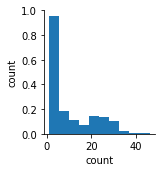

In [125]:
# group by sum the master_df dataframe for follow-on analysis
master_sum_df = final_df.groupby(['date','shoe_company', 'brand']).sum().reset_index()
summarized_df = master_sum_df[master_sum_df['count'] != 0]
summarized_df.head(5)

sns.pairplot(summarized_df)

In [126]:
master_sum_df

,date,shoe_company,brand,count
0,2019-11-16,Adidas,ADIDAS,0
1,2019-11-16,Adidas,Adidas,5
2,2019-11-16,Adidas,Kanye,2
3,2019-11-16,Adidas,Reebok,3
4,2019-11-16,Adidas,Yeezy,8
...,...,...,...,...
1458,2020-03-31,Nike,nike,20
1459,2020-03-31,Puma,Puma,0
1460,2020-03-31,Puma,puma,4
1461,2020-03-31,Vans,Vans,0


In [127]:
# 4.2.2: Unstack and pairplot the master dataframe for category_name df - #
category_df = master_sum_df[['date','shoe_company','count']]
category_df = category_df.groupby(['date','shoe_company']).sum().reset_index()
category_df.head(10)

,date,shoe_company,count
0,2019-11-16,Adidas,26
1,2019-11-16,New Balance,3
2,2019-11-16,Nike,57
3,2019-11-16,Puma,4
4,2019-11-16,Vans,2
5,2019-11-17,Adidas,25
6,2019-11-17,New Balance,3
7,2019-11-17,Nike,52
8,2019-11-17,Puma,4
9,2019-11-17,Vans,4


In [128]:
unstack_category_df = category_df.pivot_table(index = ['date'], 
                                   columns = 'shoe_company',
                                   values = 'count',
                                   aggfunc='first').reset_index().rename_axis(None, axis=1)

unstack_category_df.tail(10)

,date,Adidas,New Balance,Nike,Puma,Vans
88,2020-03-22,38,4,48,4,2
89,2020-03-23,40,5,46,4,2
90,2020-03-24,41,3,53,4,3
91,2020-03-25,41,4,52,4,2
92,2020-03-26,23,3,56,4,3
93,2020-03-27,25,2,57,4,3
94,2020-03-28,36,3,50,5,2
95,2020-03-29,33,3,49,4,3
96,2020-03-30,30,2,51,4,2
97,2020-03-31,33,4,54,4,2


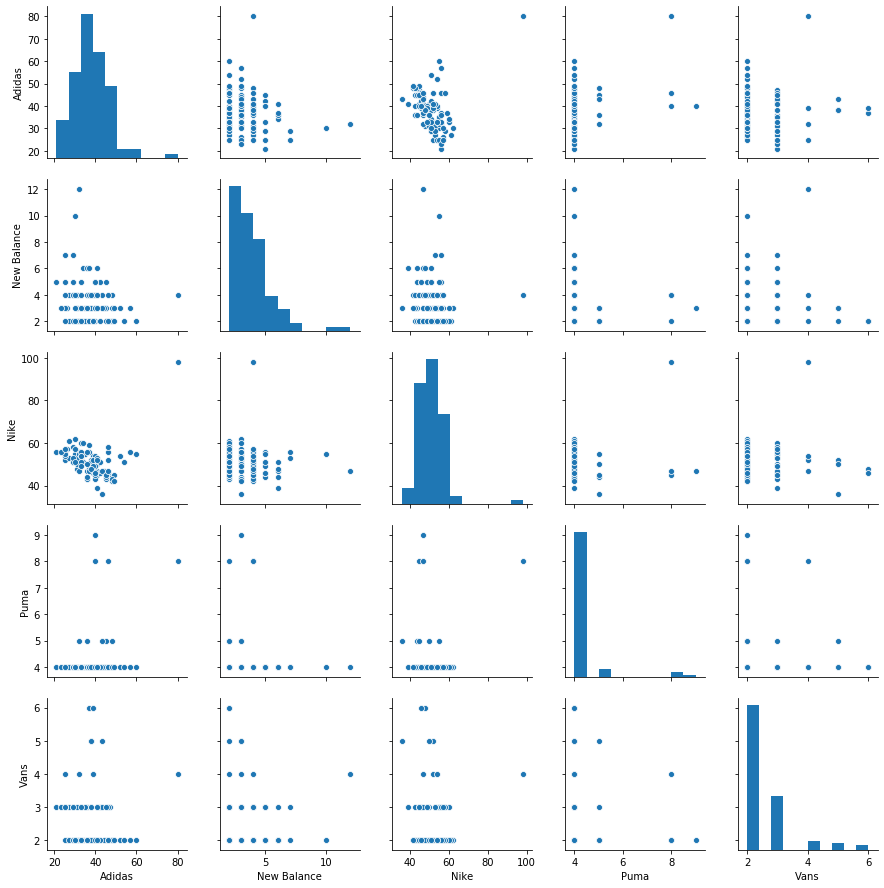

In [129]:

sns.pairplot(unstack_category_df) # pairplot the category dataframe


In [130]:
# 4.2.3: Unstack and pairplot the master dataframe for item df - #
item_temp_df = master_df[['date','brand','count']]
item2_df = item_temp_df.groupby(['date', 'brand']).sum().reset_index()

In [131]:
# remove rows where count is equal to '0'
item_df = item2_df[item2_df['count'] != 0]
item_df.head(20)

,date,brand,count
3,2020-03-22,adidas,28
4,2020-03-22,converse,3
5,2020-03-22,jordan,26
7,2020-03-22,new balance,4
8,2020-03-22,nike,19
9,2020-03-22,puma,4
10,2020-03-22,reebok,3
11,2020-03-22,vans,2
12,2020-03-22,yeezy,7
16,2020-03-23,adidas,28


In [132]:
unstack_item_df = item_df.pivot_table(index = ['date'],
                                      columns = 'brand',
                                      values = 'count',
                                      aggfunc='first').reset_index().rename_axis(None, axis=1)

unstack_item_df.tail(50)

,date,adidas,converse,jordan,kanye,new balance,nike,puma,reebok,vans,yeezy
0,2020-03-22,28.0,3.0,26.0,NaN,4.0,19.0,4.0,3.0,2.0,7.0
1,2020-03-23,28.0,5.0,25.0,NaN,5.0,16.0,4.0,3.0,2.0,9.0
2,2020-03-24,26.0,7.0,27.0,1.0,3.0,19.0,4.0,3.0,3.0,11.0
3,2020-03-25,28.0,4.0,28.0,NaN,4.0,20.0,4.0,3.0,2.0,10.0
4,2020-03-26,16.0,4.0,26.0,NaN,3.0,26.0,4.0,3.0,3.0,4.0
5,2020-03-27,18.0,3.0,31.0,NaN,2.0,23.0,4.0,3.0,3.0,4.0
6,2020-03-28,26.0,3.0,29.0,NaN,3.0,18.0,5.0,4.0,2.0,6.0
7,2020-03-29,24.0,3.0,27.0,NaN,3.0,19.0,4.0,3.0,3.0,6.0
8,2020-03-30,22.0,3.0,27.0,NaN,2.0,21.0,4.0,3.0,2.0,5.0
9,2020-03-31,20.0,3.0,31.0,NaN,4.0,20.0,4.0,4.0,2.0,9.0


In [133]:
# 4.2.4: Date and Count dataframe
date_count_temp = final_df[['date','count']]
date_count_df = date_count_temp.groupby('date').sum().reset_index()
date_count_df.tail()

,date,count
93,2020-03-27,91
94,2020-03-28,96
95,2020-03-29,92
96,2020-03-30,89
97,2020-03-31,97


In [134]:
# master counts, company agnostic

fig = px.line(date_count_df, x='date', y='count')
fig.update_layout(
    title="Shoe Company Daily Count Summary",
    xaxis_title="Date",
    yaxis_title="Total Daily Counts",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

In [135]:
# master counts, by day and shoe company

# 4.2.4: Date and Count dataframe
date_shoe_temp = final_df[['date','shoe_company', 'count']]
date_shoe_df = date_shoe_temp.groupby(['date', 'shoe_company']).sum().reset_index()

fig = px.line(date_shoe_df, x='date', y='count', color='shoe_company')
fig.update_layout(
    title="Shoe Company Daily Count Summary",
    xaxis_title="Date",
    yaxis_title="Total Daily Counts",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

In [136]:
fig = px.area(date_shoe_df, x='date', y='count', color = 'shoe_company')
fig.show()

In [137]:
sum_df = master_df.groupby(['date', 'shoe_company', 'brand']).sum().reset_index()

fig = pf.genSankey(sum_df,cat_cols=['shoe_company', 'brand'],value_cols='count',title='Sneaker Sankey Analysis')
po.offline.plot(fig, validate=False)

'temp-plot.html'

### Multi-variate Regression Analysis

In [138]:
unstack_df = unstack_category_df.copy()
unstack_df.fillna(0, inplace = True)
unstack_df.head(10)

,date,Adidas,New Balance,Nike,Puma,Vans
0,2019-11-16,26,3,57,4,2
1,2019-11-17,25,3,52,4,4
2,2019-11-18,31,3,52,4,2
3,2019-11-19,27,4,53,4,3
4,2019-11-20,25,4,54,4,3
5,2019-11-21,25,7,56,4,2
6,2019-11-22,33,4,49,4,2
7,2019-11-23,29,4,51,4,2
8,2019-11-24,31,4,48,4,2
9,2019-11-25,41,4,45,4,3


In [139]:
unstack_df['total_counts'] = unstack_df['Adidas']  + unstack_df['New Balance'] + unstack_df['Nike'] + unstack_df['Puma'] + unstack_df['Vans']

unstack_df.head(5)

,date,Adidas,New Balance,Nike,Puma,Vans,total_counts
0,2019-11-16,26,3,57,4,2,92
1,2019-11-17,25,3,52,4,4,88
2,2019-11-18,31,3,52,4,2,92
3,2019-11-19,27,4,53,4,3,91
4,2019-11-20,25,4,54,4,3,90


In [140]:
X = unstack_df[['Adidas', 'New Balance','Nike','Puma','Vans']]
X

,Adidas,New Balance,Nike,Puma,Vans
0,26,3,57,4,2
1,25,3,52,4,4
2,31,3,52,4,2
3,27,4,53,4,3
4,25,4,54,4,3
...,...,...,...,...,...
93,25,2,57,4,3
94,36,3,50,5,2
95,33,3,49,4,3
96,30,2,51,4,2


In [141]:
y = unstack_df[['total_counts']]
y

,total_counts
0,92
1,88
2,92
3,91
4,90
...,...
93,91
94,96
95,92
96,89


In [142]:
X

,Adidas,New Balance,Nike,Puma,Vans
0,26,3,57,4,2
1,25,3,52,4,4
2,31,3,52,4,2
3,27,4,53,4,3
4,25,4,54,4,3
...,...,...,...,...,...
93,25,2,57,4,3
94,36,3,50,5,2
95,33,3,49,4,3
96,30,2,51,4,2


In [143]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
print('Intercept: \n', regr.intercept_)

Intercept: 
 [9.9475983e-14]


In [145]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[1. 1. 1. 1. 1.]]


In [146]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

/Users/patrickbenitez/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [147]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           total_counts   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.780e+30
Date:                Tue, 31 Mar 2020   Prob (F-statistic):               0.00
Time:                        05:40:12   Log-Likelihood:                 2939.4
No. Observations:                  98   AIC:                            -5867.
Df Residuals:                      92   BIC:                            -5851.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.842e-14   2.32e-14      1.224      

In [148]:
tri_dim = unstack_df[['Adidas','Nike','total_counts']]
tri_dim

,Adidas,Nike,total_counts
0,26,57,92
1,25,52,88
2,31,52,92
3,27,53,91
4,25,54,90
...,...,...,...
93,25,57,91
94,36,50,96
95,33,49,92
96,30,51,89


Find the 95% confidence interval for total_counts column

In [149]:
import numpy as np, scipy.stats as st

count_list = list(tri_dim['total_counts'])
count_array = np.array(count_list)

lower, higher = st.t.interval(0.95, len(count_array)-1, loc=np.mean(count_array), scale=st.sem(count_array))


In [150]:
lower

96.5778813957814

In [151]:
higher

101.25885329809616

In [152]:
count_mask = (tri_dim['total_counts'] > lower) & (tri_dim['total_counts'] < higher)
tri_mask = tri_dim.loc[count_mask]

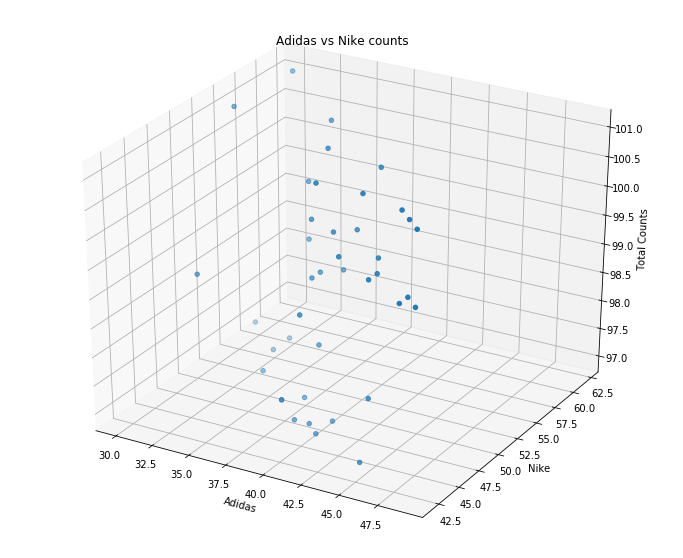

In [157]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

threedee = plt.figure(figsize = (12,10)).gca(projection='3d')
threedee.scatter(tri_mask['Adidas'], tri_mask['Nike'], tri_mask['total_counts'], cmap=cm.rainbow)
plt.title('Adidas vs Nike counts')
threedee.set_xlabel('Adidas')
threedee.set_ylabel('Nike')
threedee.set_zlabel('Total Counts')
plt.show()



## Change Point Detection

Retrieve data from the unstacked dataframe, previously aggregated

In [158]:
unstack_df.head(5)

,date,Adidas,New Balance,Nike,Puma,Vans,total_counts
0,2019-11-16,26,3,57,4,2,92
1,2019-11-17,25,3,52,4,4,88
2,2019-11-18,31,3,52,4,2,92
3,2019-11-19,27,4,53,4,3,91
4,2019-11-20,25,4,54,4,3,90
5,2019-11-21,25,7,56,4,2,94
6,2019-11-22,33,4,49,4,2,92
7,2019-11-23,29,4,51,4,2,90
8,2019-11-24,31,4,48,4,2,89
9,2019-11-25,41,4,45,4,3,97


In [ ]:
Slice on the date, Nike, and to

## Program Completed

In [154]:
program_end = t.time() - program_start
print("Total time for program execution: ", round(program_end, 2), " seconds")

Total time for program execution:  13.98  seconds
